In [7]:
!conda activate geo_env

In [3]:
!pip install chardet --force-reinstall

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)


In [11]:
#Cargar las librerías
import pandas as pd
import chardet
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#Cargar los datos

In [13]:
charenc = chardet.detect(open('../../_data/data_dengue_peru.csv', 'rb').read())['encoding']
print(charenc)
print('\n')
dengue = pd.read_csv( '../../_data/data_dengue_peru.csv', encoding = charenc)
print('Dimensiones del df:', dengue.shape)
print('\n')
print(dengue.dtypes)

UTF-8-SIG


Dimensiones del df: (172144, 8)


Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo              int64
Casos              object
dtype: object


C:\Users\DELL\AppData\Local\Temp\ipykernel_27652\1002911966.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue = pd.read_csv( '../../_data/data_dengue_peru.csv', encoding = charenc)


In [15]:
dengue.head(5)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0


In [17]:
cols_1 = ['Eventos o daños', 'Departamento', 'Distrito', 'Provincia']
dengue[cols_1] = dengue[cols_1].astype('string')
print(dengue.dtypes)
print('\n')
#Por el tipo de data, el identificador se repetirá varias veces (hay datos por año y semana). Es normal que no sea único.
print(dengue['Ubigeo'].is_unique)
print('\n')
#Verificamos si la columna Casos tiene valores con coma (p. ej., 1,000 en vez de 1000).
#Si True, al menos uno tiene coma.
ValorConComa = dengue['Casos'].str.contains(',').any()
print(ValorConComa)

Año                         int64
Semana                      int64
Eventos o daños    string[python]
Departamento       string[python]
Distrito           string[python]
Provincia          string[python]
Ubigeo                      int64
Casos                      object
dtype: object


False


True


In [9]:
#Pasamos la columna 'Ubigeo' (ID del distrito) a string. Si está como integer o Int64, se eliminan los 0 a la izquierda.
#El ID debe tener 6 dígitos. Si solo hay 5, le añadimos un 0 al inicio. 
dengue['Ubigeo'] = dengue['Ubigeo'].apply(lambda row: str(row).zfill(6))
dengue.head(5)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0


In [11]:
# Recodificamos los valores de la columna 'Casos'.
# Primero, aplicamos una función lambda a cada valor (fila) de la columna 'Casos'.
# La función convierte cada valor a string y elimina la coma (si la tiene), pero solo si el valor no es NaN.
# Si el valor es NaN (pd.notna(row) es False), lo dejamos sin cambios.
# Después, convertimos los valores a 'float' para que Pandas permita la conversión a 'Int64'.
# Finalmente, convertimos los valores a 'Int64', lo cual es adecuado para un conteo de casos.
# Usamos 'Int64' en lugar de 'int' para permitir que los valores NaN se mantengan sin alterarse.
dengue['Casos'] = dengue['Casos'].apply(lambda row: str(row).replace(',', '') if pd.notna(row) else row).astype(float).astype('Int64')
dengue.head(5)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2


In [13]:
#Creamos la columna 'Ubigeo_Departamento' extrayendo los dos primeros caracteres de 'Ubigeo'.
dengue['Ubigeo_Departamento'] = dengue['Ubigeo'].str[0:2]
#Creamos la columna 'Ubigeo_Provincia' extrayendo los cuatro primeros caracteres de 'Ubigeo'.
dengue['Ubigeo_Provincia'] = dengue['Ubigeo'].str[0:4]
dengue.head(5)

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Departamento,Ubigeo_Provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,08,0809


In [15]:
#Cargamos los datos del shapefile para obtener los polígonos (mapas) de los distritos
distritos_shp = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
#Verificamos si el archivo tiene información sobre la proyección. Debe ser EPSG: 4326 (para WGS-84).
print(distritos_shp.crs), print('\n')
print(distritos_shp.shape, '\n')
distritos_shp.head(5)

EPSG:4326


(1874, 16) 



,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


In [17]:
print('¿Los valores de UBIGEO son únicos?', distritos_shp['UBIGEO'].is_unique, '. Hay:', distritos_shp['UBIGEO'].unique().size)
#Al 2022, el Perú tenía 1874 distritos.
print(distritos_shp['UBIGEO'].dtype)

¿Los valores de UBIGEO son únicos? True . Hay: 1874
object


In [19]:
mapas = distritos_shp[['UBIGEO', 'geometry']].copy()
mapas.rename(columns = {'UBIGEO': 'Ubigeo'}, inplace = True)
mapas['Ubigeo'] = mapas['Ubigeo'].astype(str)
print(f'Deben haber 1874 filas (distritos al 2022):', mapas.shape)
mapas.head(5)

Deben haber 1874 filas (distritos al 2022): (1874, 2)


,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


In [23]:
# Filtrar las filas donde 'Año' es 2021
dengue_2021 = dengue[dengue['Año'] == 2021]

# Reordenar las columnas según lo solicitado
dengue_2021 = dengue_2021[['Año', 'Semana', 'Departamento', 'Provincia', 'Distrito', 
                           'Ubigeo_Departamento', 'Ubigeo_Provincia', 'Ubigeo', 'Casos']]

dengue_2021.head(5)

,Año,Semana,Departamento,Provincia,Distrito,Ubigeo_Departamento,Ubigeo_Provincia,Ubigeo,Casos
1,2021,41,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,18,1801,180101,<NA>
2,2021,42,MOQUEGUA,MARISCAL NIETO,MOQUEGUA,18,1801,180101,<NA>
6,2021,41,LIMA,LIMA,INDEPENDENCIA,15,1501,150112,<NA>
7,2021,41,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,15,1501,150143,<NA>
8,2021,41,LIMA,LIMA,ATE,15,1501,150103,<NA>


In [41]:
# Definimos una función para sumar los casos.
# Si más del 65% de los valores en el grupo son NA, la suma será NA.
# Si menos del 65% son NA, sumamos los casos ignorando los valores NA.
def sumar_casos(total):
    if total.isna().mean() >= 0.65:
        return pd.NA  # Si más del 65% son NA, devolvemos NA
    else:
        return total.sum()  # Si no, sumamos los valores no NA

# Generamos el nuevo df 'df_2021', agrupando por 'Ubigeo' y aplicando la función sumar_casos
df_2021 = dengue_2021.groupby('Ubigeo', as_index=False).agg(
    Casos_distrital_2021=('Casos', sumar_casos))

# Hacemos un merge para agregar la columna 'Ubigeo' y 'geometry' desde el df 'mapas'
df_2021 = pd.merge(mapas[['Ubigeo', 'geometry']], df_2021, on='Ubigeo', how='left')

# Hacemos un merge para agregar información desde el df dengue. Debemos indicar drop_duplicates() para no repetir cada fila
df_2021 = pd.merge(df_2021, 
                   dengue_2021[['Departamento', 'Provincia', 'Distrito', 'Ubigeo_Departamento', 'Ubigeo_Provincia', 'Ubigeo']].drop_duplicates(), 
                   on = 'Ubigeo', 
                   how = 'left')

# Añadimos una columna Año con valor 2021
df_2021['Año'] = '2021'

# Reordenamos las columnas
df_2021 = df_2021[['Año', 'Departamento', 'Provincia', 'Distrito', 'Ubigeo_Departamento', 'Ubigeo_Provincia', 'Ubigeo', 'Casos_distrital_2021', 'geometry']]

#df_2021.head(20)
print(df_2021.dtypes)
print('\n', f'El n de filas debería ser 1874.', df_2021.shape)

Año                             object
Departamento            string[python]
Provincia               string[python]
Distrito                string[python]
Ubigeo_Departamento             object
Ubigeo_Provincia                object
Ubigeo                          object
Casos_distrital_2021             Int64
geometry                      geometry
dtype: object

 El n de filas debería ser 1874. (1874, 9)


In [45]:
# Definimos el objeto con las columnas que queremos convertir a string
df_2021_cols = ['Año', 'Ubigeo_Departamento', 'Ubigeo_Provincia', 'Ubigeo']

# Convertimos todas las columnas en F1_col a string
df_2021[df_2021_cols] = df_2021[df_2021_cols].astype('string')

# Convertir la columna a float64 para manejar mejor los NaN
df_2021['Casos_distrital_2021'] = df_2021['Casos_distrital_2021'].astype('float64')

print(df_2021.dtypes, '\n')
df_2021.head(10)

Año                     string[python]
Departamento            string[python]
Provincia               string[python]
Distrito                string[python]
Ubigeo_Departamento     string[python]
Ubigeo_Provincia        string[python]
Ubigeo                  string[python]
Casos_distrital_2021             Int64
geometry                      geometry
dtype: object 



,Año,Departamento,Provincia,Distrito,Ubigeo_Departamento,Ubigeo_Provincia,Ubigeo,Casos_distrital_2021,geometry
0,2021,<NA>,<NA>,<NA>,<NA>,<NA>,060504,<NA>,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,2021,<NA>,<NA>,<NA>,<NA>,<NA>,061105,<NA>,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,2021,<NA>,<NA>,<NA>,<NA>,<NA>,061109,<NA>,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,2021,<NA>,<NA>,<NA>,<NA>,<NA>,061110,<NA>,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,2021,<NA>,<NA>,<NA>,<NA>,<NA>,061203,<NA>,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
5,2021,<NA>,<NA>,<NA>,<NA>,<NA>,140103,<NA>,"POLYGON ((-79.84212 -6.87952, -79.84169 -6.879..."
6,2021,LAMBAYEQUE,CHICLAYO,LA VICTORIA,14,1401,140106,4,"POLYGON ((-79.83314 -6.78666, -79.83225 -6.790..."
7,2021,LAMBAYEQUE,CHICLAYO,LAGUNAS,14,1401,140107,0,"POLYGON ((-79.66093 -6.90007, -79.65973 -6.900..."
8,2021,LAMBAYEQUE,CHICLAYO,MONSEFU,14,1401,140108,1,"POLYGON ((-79.78014 -6.82123, -79.77781 -6.821..."
9,2021,<NA>,<NA>,<NA>,<NA>,<NA>,140114,<NA>,"POLYGON ((-79.89631 -6.84974, -79.89438 -6.850..."


In [49]:
# Obtenemos los estadísticos descriptivos de la columna 'Casos_distrital_2021'
descriptivos = df_2021['Casos_distrital_2021'].describe()
mediana = df_2021['Casos_distrital_2021'].median()

print(f"Estadísticos descriptivos:\n{descriptivos}\n", f"Mediana: {mediana}")

Estadísticos descriptivos:
count         469.0
mean      77.176972
std      220.128723
min             0.0
25%             1.0
50%             8.0
75%            59.0
max          2267.0
Name: Casos_distrital_2021, dtype: Float64
 Mediana: 8.0


<Axes: title={'center': 'Número de casos de dengue en el 2021 a nivel distrital'}>

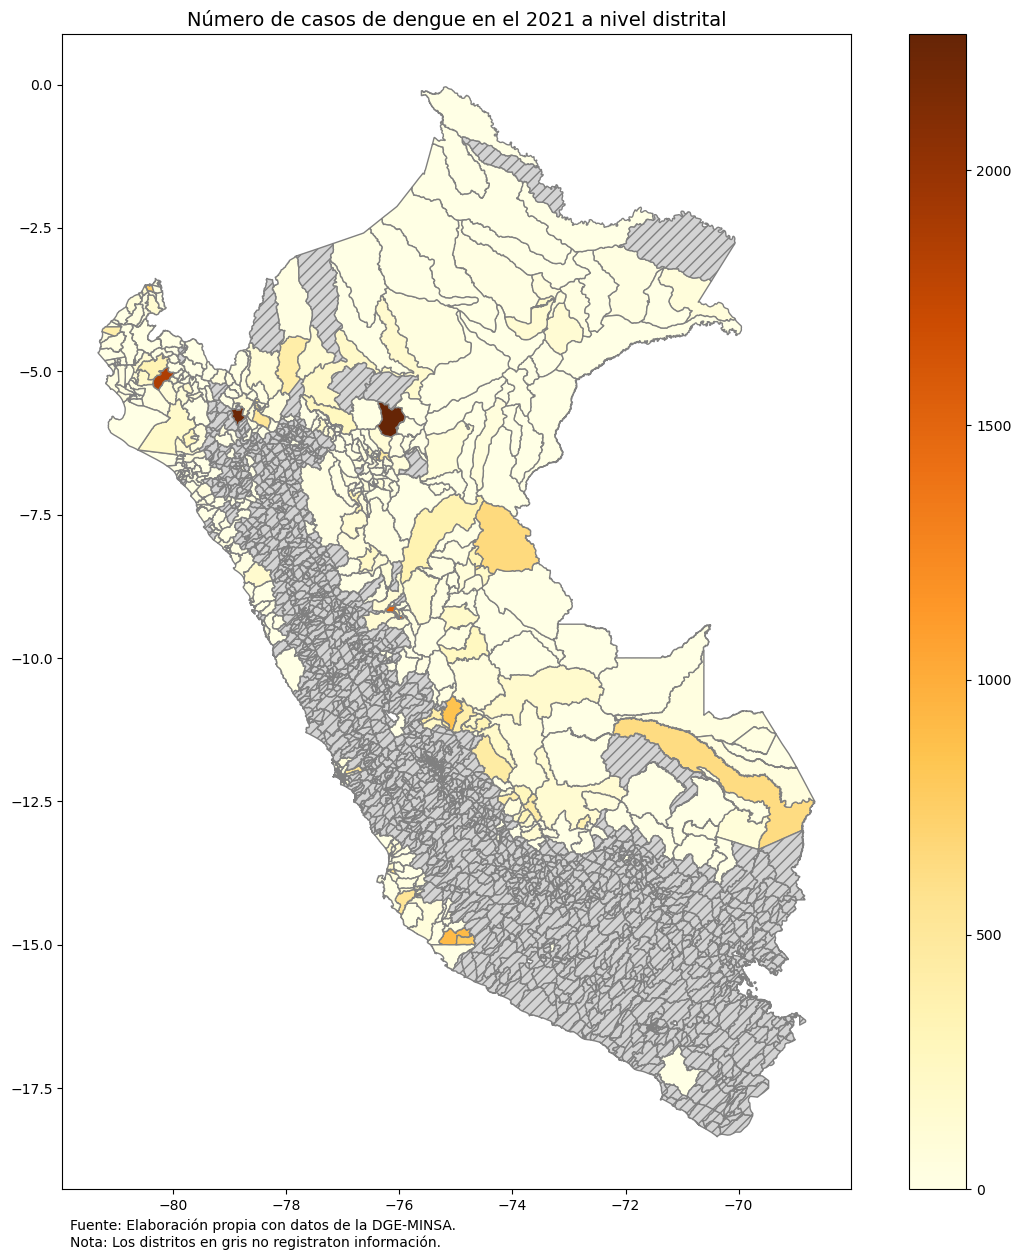

In [71]:
#Figura 1

# Graficamos el mapa directamente sin usar subplots
F1= df_2021.plot(column = 'Casos_distrital_2021',
                 cmap = 'YlOrBr',
                 legend = True,
                 edgecolor = 'gray',
                 missing_kwds = {"color": "lightgrey",
                                 "hatch": "///",
                                 "label": "No data"},
                 figsize = (15, 15))  # Establecemos el tamaño de la figura

plt.title('Número de casos de dengue en el 2021 a nivel distrital', fontsize=14)

plt.text(x = 0.01, y = -0.05, s = "Fuente: Elaboración propia con datos de la DGE-MINSA.\nNota: Los distritos en gris no registraton información.", 
         transform= plt.gca().transAxes, fontsize = 10, ha = 'left')

F1

In [ ]:
#Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. 
#Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. 
#Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [21]:
# Cargar las librerías
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np



# Limpieza y preparación de datos
dengue['Ubigeo'] = dengue['Ubigeo'].apply(lambda row: str(row).zfill(6))
dengue['Casos'] = dengue['Casos'].apply(lambda row: str(row).replace(',', '') if pd.notna(row) else row).astype(float).astype('Int64')
dengue['Ubigeo_Departamento'] = dengue['Ubigeo'].str[0:2]
dengue['Ubigeo_Provincia'] = dengue['Ubigeo'].str[0:4]

# Filtrar para el año 2021
dengue_2021 = dengue[dengue['Año'] == 2021]

# Crear columna 'Trimestre'
dengue_2021['Trimestre'] = (dengue_2021['Semana'].astype(int) - 1) // 13 + 1

# Agregar casos por departamento y trimestre
dengue_2021['Casos'] = dengue_2021['Casos'].fillna(0)
df_2021 = dengue_2021.groupby(['Ubigeo_Departamento', 'Trimestre'], as_index=False).agg({'Casos': 'sum'})

# Cargar shapefile de distritos
distritos_shp = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
mapas = distritos_shp[['UBIGEO', 'geometry']].copy()
mapas.rename(columns={'UBIGEO': 'Ubigeo'}, inplace=True)
mapas['Ubigeo'] = mapas['Ubigeo'].astype(str)

# Agregar geometría al dataframe de casos
df_2021 = pd.merge(df_2021, mapas, left_on='Ubigeo_Departamento', right_on='Ubigeo', how='left')
gdf_2021 = gpd.GeoDataFrame(df_2021, geometry='geometry')

# Crear subplots para cada trimestre
fig, axs = plt.subplots(2, 2, figsize=(15, 15), constrained_layout=True)
axs = axs.flatten()
trimestres = [1, 2, 3, 4]

# Crear un mapa para cada trimestre
for i, trimestre in enumerate(trimestres):
    trimestral = gdf_2021[gdf_2021['Trimestre'] == trimestre]
    
    # Plotear el mapa
    ax = axs[i]
    trimestral.plot(column='Casos', cmap='YlOrBr', legend=True, ax=ax,
                    missing_kwds={"color": "lightgrey", "hatch": "///", "label": "No data"})
    
    # Añadir título y personalizar leyenda
    ax.set_title(f'Trimestre {trimestre} 2021', fontsize=14)
    ax.set_axis_off()

# Mostrar el gráfico
plt.suptitle('Número de casos de dengue por departamento para 2021', fontsize=16)
plt.show()



TypeError: float() argument must be a string or a number, not 'NAType'